In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('HR_comma_sep.csv', sep=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.sales.value_counts()

0    11428
1     3571
Name: left, dtype: int64

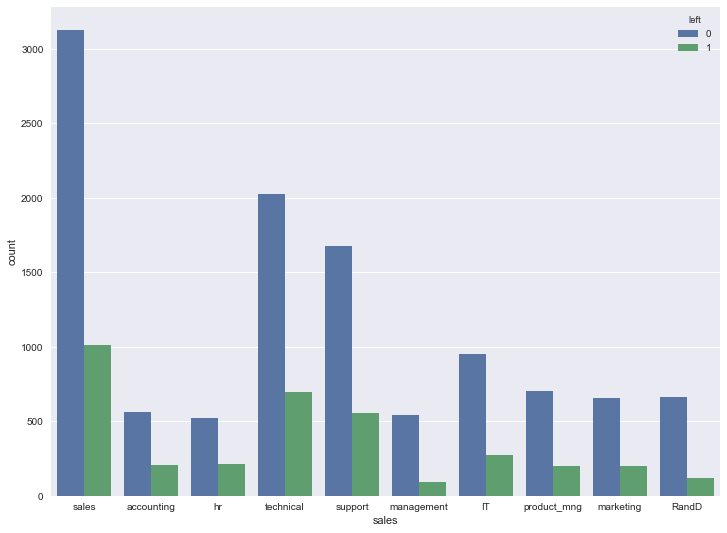

In [8]:
plt.figure(figsize= (12,9))
sns.countplot(data=df, x='sales', hue='left')

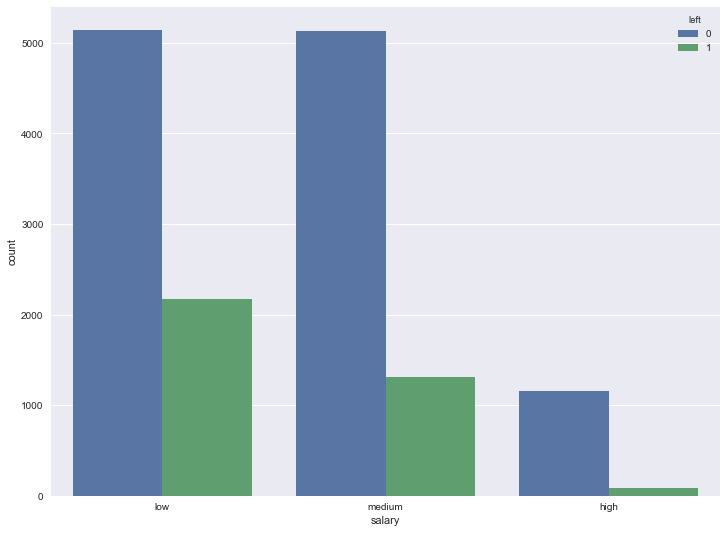

In [9]:
plt.figure(figsize= (12,9))
sns.countplot(data=df, x='salary', hue='left')

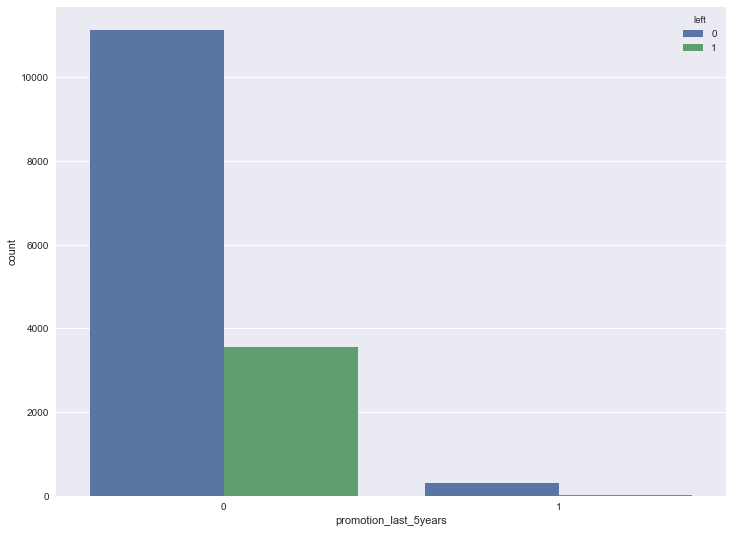

In [12]:
plt.figure(figsize= (12,9))
sns.countplot(data=df, x='promotion_last_5years', hue='left')

In [15]:
from sklearn.model_selection import train_test_split

In [22]:

df_final = pd.get_dummies(df,['sales', 'salary'])

In [23]:
X=df_final.drop('left', axis=1)
y=df.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
df_final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)


In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96      3769
          1       0.88      0.90      0.89      1181

avg / total       0.95      0.95      0.95      4950

